Logistic Activation Function

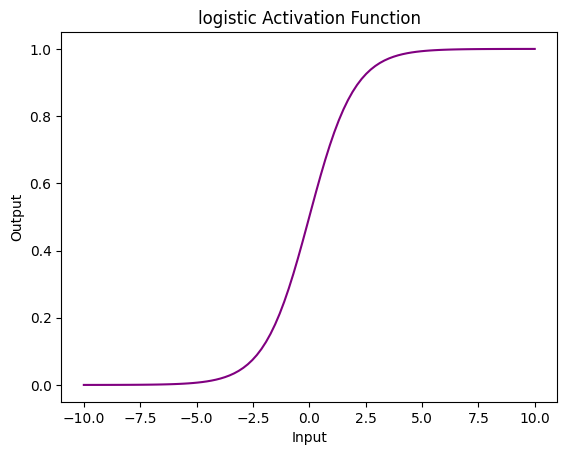

In [1]:
#Importing the libraries
import torch
import matplotlib.pyplot as plt

#Create a PyTorch tensor
x=torch.linspace(-10,10,100)

#apply the logistic activation function to the tensor
y=torch.sigmoid(x)

#plot the result with a custom color
plt.plot(x.numpy(),y.numpy(),color='purple')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('logistic Activation Function')
plt.show()

Tanh Activation Function

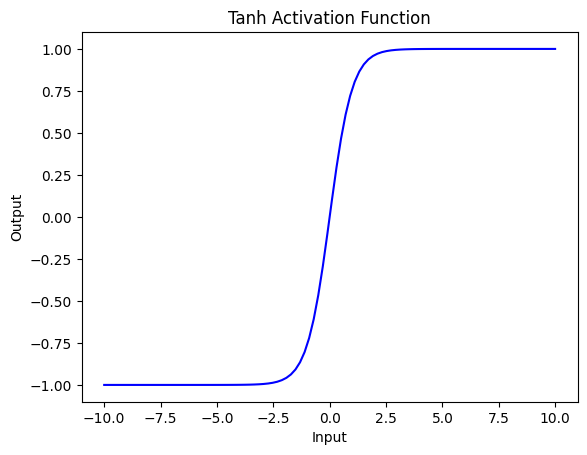

In [2]:
#apply the tanh activation function to the tensor
y=torch.tanh(x)


#plot the results with a custom color
plt.plot(x.numpy(),y.numpy(),color='blue')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Tanh Activation Function')
plt.show()

ReLU Activation Function

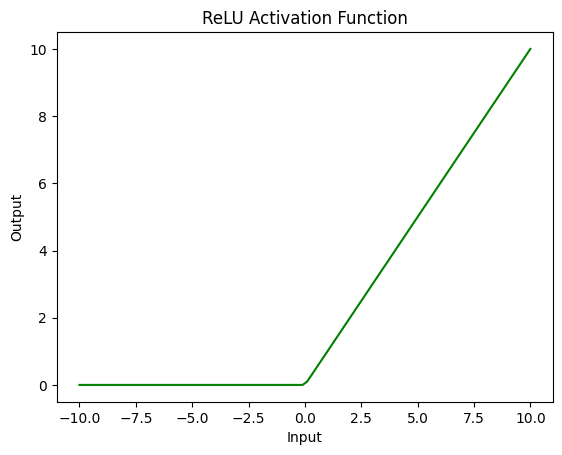

In [3]:
#apply the ReLU activation function to the tensor
y=torch.relu(x)

#plot the results with a custom color
plt.plot(x.numpy(),y.numpy(),color='green')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU Activation Function')
plt.show()

Activation Functions in a Neural Network

In [5]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load the MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='data/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data/', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes,activation_function):
    super(NeuralNetwork,self).__init__()
    self.layer1=nn.Linear(input_size,hidden_size)
    self.layer2=nn.Linear(hidden_size,hidden_size)
    self.layer3=nn.Linear(hidden_size,num_classes)
    self.activation_function=activation_function

  def forward(self,x):
    x=self.activation_function(self.layer1(x))
    x=self.activation_function(self.layer2(x))
    x=self.layer3(x)
    return x

Training and Testing the Model with Different Activation Functions

In [7]:
def train(network,data_loader,criterion,optimizer,device):
  network.train()
  running_loss=0.0

  for data,target in data_loader:
    data,target=data.to(device),target.to(device)
    data=data.view(data.shape[0],-1)

    optimizer.zero_grad()
    output=network(data)
    loss=criterion(output,target)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item() * data.size(0)

  return running_loss/len(data_loader.dataset)

def test(network,data_loader,criterion,device):
  network.eval()
  correct=0
  total=0
  test_loss=0.0

  with torch.no_grad():
    for data,target in data_loader:
      data,target=data.to(device),target.to(device)
      data=data.view(data.shape[0],-1)

      output=network(data)
      loss=criterion(output,target)
      test_loss+=loss.item() *data.size(0)
      _,predicted=torch.max(output.data,1)
      total+=target.size(0)
      correct+=(predicted==target).sum().item()
  return test_loss/len(data_loader.dataset),100*correct/total


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Changed 'is_avilable' to 'is_available' and 'cuda' to 'cpu' in the else condition
input_size=784
hidden_size=128
num_classes=10
num_epochs=10
learning_rate=0.001

activation_functions={
    'ReLU':nn.ReLU(),
    'Sigmoid':nn.Sigmoid(),
    'Tanh':nn.Tanh(),
    'LeakyReLU':nn.LeakyReLU()

}
results={}

# Train and test the model with different activation functions
for name,activation_function in activation_functions.items():
  print(f"Training with {name} activation function...")

  model=NeuralNetwork(input_size,hidden_size,num_classes,activation_function).to(device)
  criterion=nn.CrossEntropyLoss()
  optimizer=optim.Adam(model.parameters(),lr=learning_rate)

  train_loss_history=[]
  test_loss_history=[]
  test_accuracy_history=[]

  for epoch in range(num_epochs):
    train_loss=train(model,train_loader,criterion,optimizer,device)
    test_loss,test_accuracy=test(model,test_loader,criterion,device)

    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}],Test Loss:{test_loss:.4f},Test Accuracy:{test_accuracy:.2f}%")


  results[name]={
      'train_loss_history':train_loss_history,
      'test_loss_history':test_loss_history,
      'test_accuracy_history':test_accuracy_history
  }


Training with ReLU activation function...
Epoch [1/10],Test Loss:0.1806,Test Accuracy:94.53%
Epoch [2/10],Test Loss:0.1170,Test Accuracy:96.51%
Epoch [3/10],Test Loss:0.0904,Test Accuracy:97.21%
Epoch [4/10],Test Loss:0.0859,Test Accuracy:97.27%
Epoch [5/10],Test Loss:0.0812,Test Accuracy:97.47%
Epoch [6/10],Test Loss:0.0735,Test Accuracy:97.87%
Epoch [7/10],Test Loss:0.0798,Test Accuracy:97.69%
Epoch [8/10],Test Loss:0.0734,Test Accuracy:98.00%
Epoch [9/10],Test Loss:0.0759,Test Accuracy:97.97%
Epoch [10/10],Test Loss:0.0851,Test Accuracy:97.87%
Training with Sigmoid activation function...
Epoch [1/10],Test Loss:0.2594,Test Accuracy:92.40%
Epoch [2/10],Test Loss:0.1731,Test Accuracy:94.77%
Epoch [3/10],Test Loss:0.1343,Test Accuracy:96.05%
Epoch [4/10],Test Loss:0.1193,Test Accuracy:96.31%
Epoch [5/10],Test Loss:0.1122,Test Accuracy:96.56%
Epoch [6/10],Test Loss:0.0932,Test Accuracy:97.06%
Epoch [7/10],Test Loss:0.0953,Test Accuracy:96.90%
Epoch [8/10],Test Loss:0.0799,Test Accuracy:9

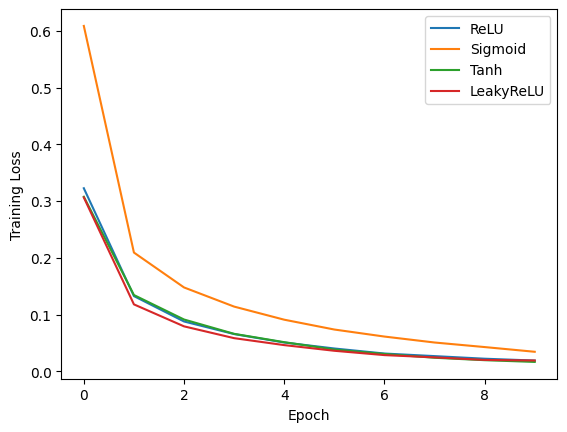

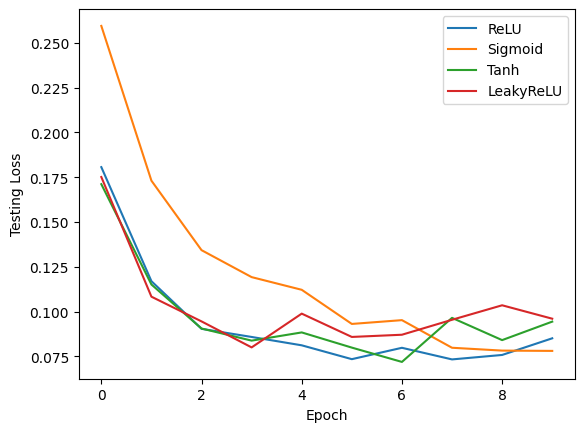

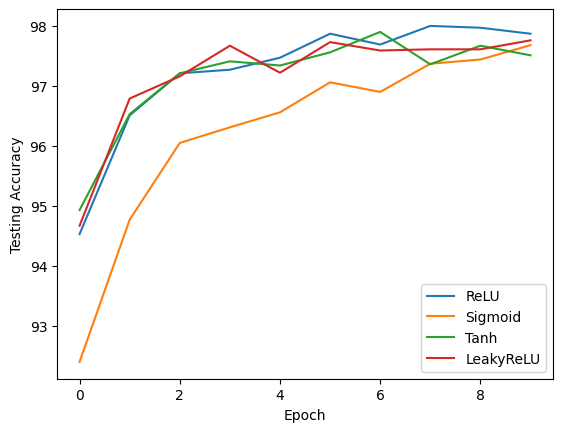

In [11]:
import matplotlib.pyplot as plt
#Plot the training loss
plt.figure()
for name,data in results.items():
    plt.plot(data['train_loss_history'],label=name) # Changed 'Train_loss_history' to 'train_loss_history'
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

#plot the testing loss
plt.figure()
for name,data in results.items():
    plt.plot(data['test_loss_history'],label=name)
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.legend()
plt.show()

#plot the testing accuracy
plt.figure()
for name,data in results.items():
  plt.plot(data['test_accuracy_history'],label=name)
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()